1 - Top 10 artistas mais frequentes?
2 - Qual é a distribuição da dançabilidade das músicas?
3 - Qual é a distribuição de acústica das músicas?
4 - Qual é a relação entre a dançabilidade e a energia das músicas?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
try:
    
    df = pd.read_csv('Popular_Spotify_Songs.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        
        df = pd.read_csv('Popular_Spotify_Songs.csv', encoding='latin-1')
    except Exception as e:
        print("Error:", e)

In [3]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


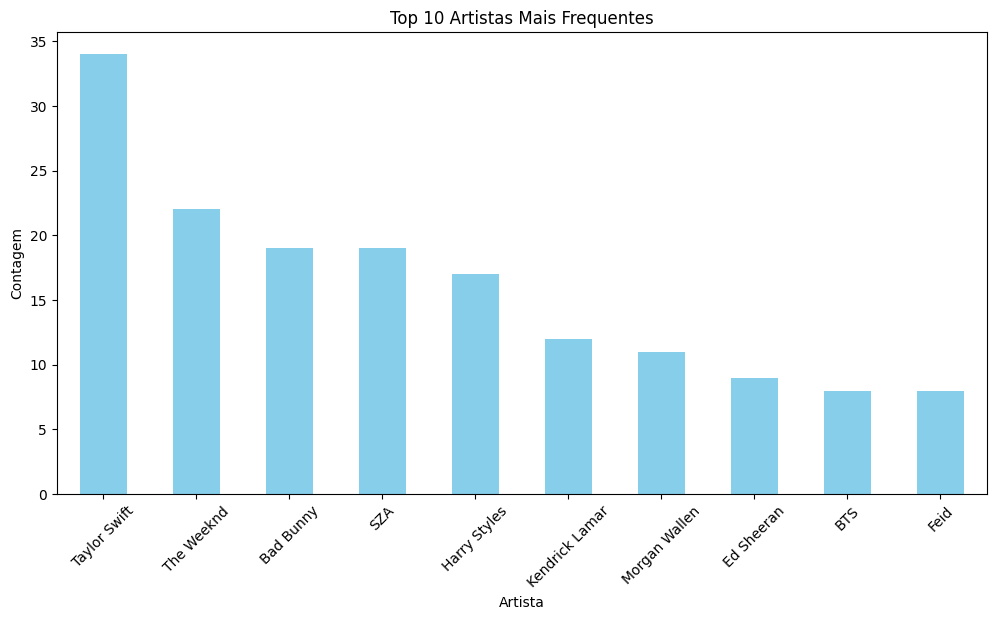

In [4]:
# 1. Top 10 artistas mais frequentes?

plt.figure(figsize=(12, 6))
df['artist(s)_name'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Artistas Mais Frequentes')
plt.xlabel('Artista')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

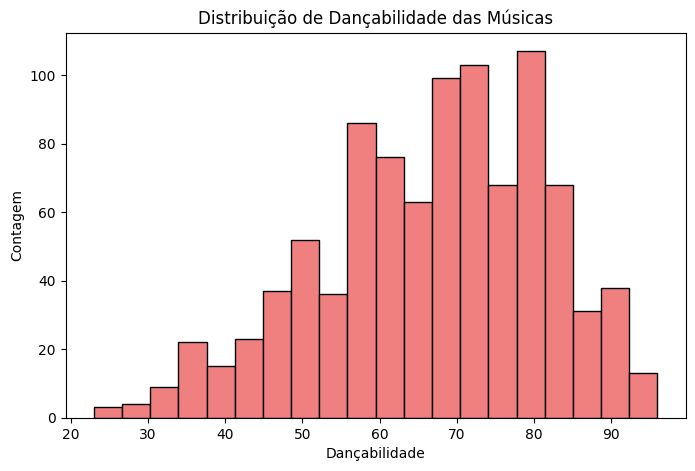

In [5]:
# 2 - Qual é a distribuição da dançabilidade das músicas?

plt.figure(figsize=(8, 5))
plt.hist(df['danceability_%'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribuição de Dançabilidade das Músicas')
plt.xlabel('Dançabilidade')
plt.ylabel('Contagem')
plt.show()

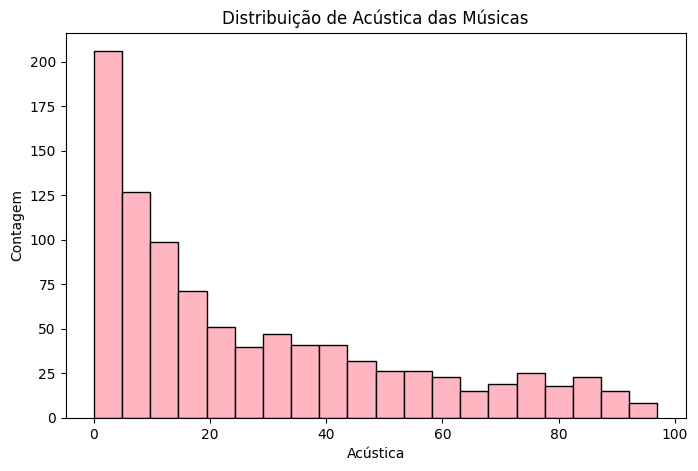

In [6]:
# 3. Qual é a distribuição de acústica (acousticness) das músicas?
plt.figure(figsize=(8, 5))
plt.hist(df['acousticness_%'], bins=20, color='lightpink', edgecolor='black')
plt.title('Distribuição de Acústica das Músicas')
plt.xlabel('Acústica')
plt.ylabel('Contagem')
plt.show()

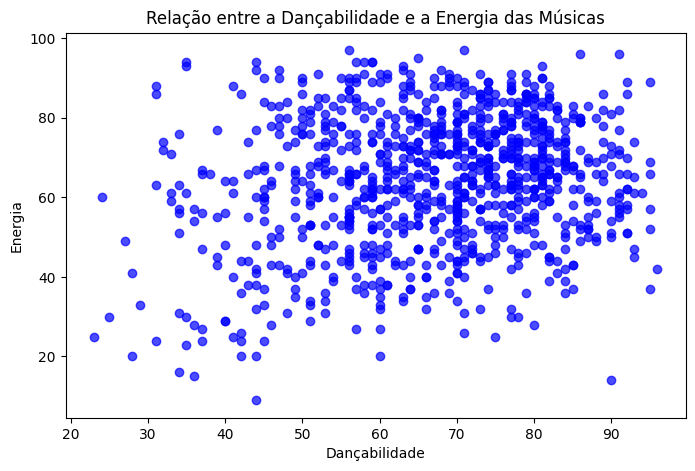

In [7]:
# 4 - Qual é a relação entre a dançabilidade e a energia das músicas?

plt.figure(figsize=(8, 5))
plt.scatter(df['danceability_%'], df['energy_%'], color='blue', alpha=0.7)
plt.title('Relação entre a Dançabilidade e a Energia das Músicas')
plt.xlabel('Dançabilidade')
plt.ylabel('Energia')
plt.show()

In [8]:
df['streams']= pd.to_numeric(df['streams'], errors='coerce')

df = df.dropna(subset=['streams'])

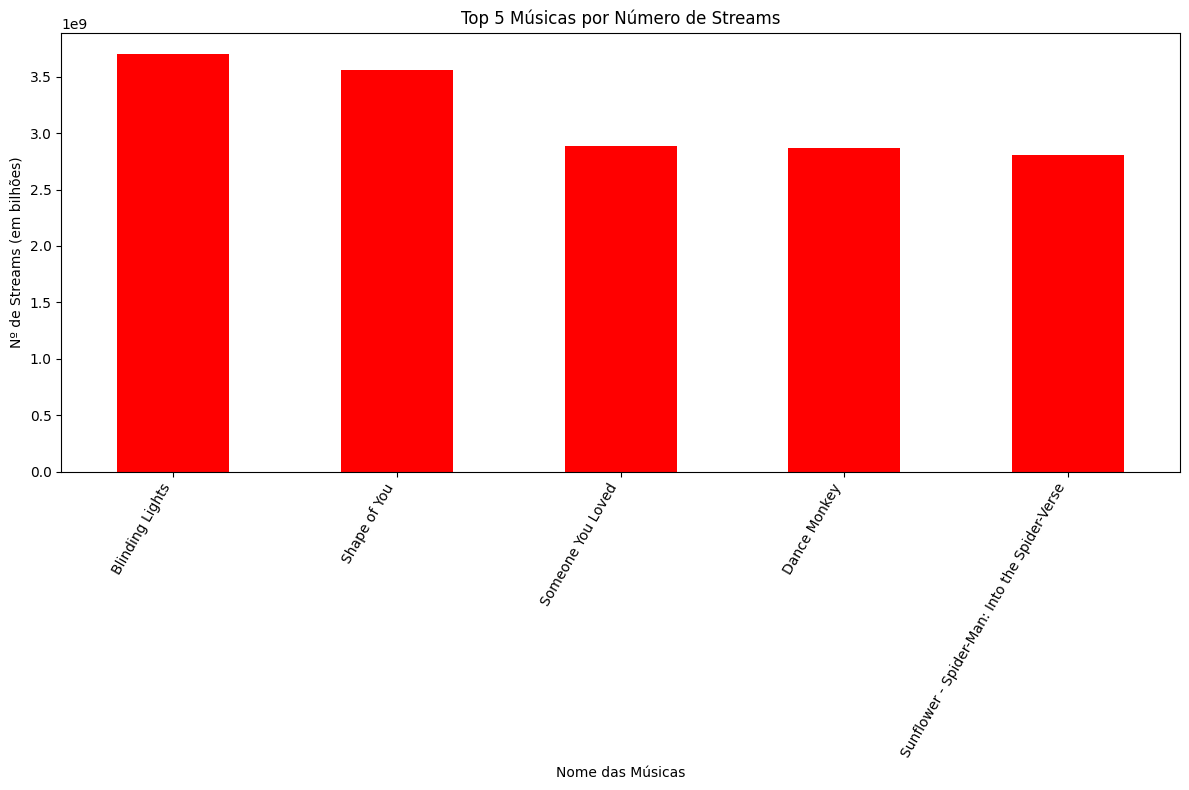

In [9]:
# 5 - Quais são as 5 musicas com mais streams?
top_songs = df.groupby('track_name')['streams'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(12, 8))
top_songs.plot(kind='bar', color='red')
plt.xlabel('Nome das Músicas')
plt.ylabel('Nº de Streams (em bilhões)')
plt.title('Top 5 Músicas por Número de Streams')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

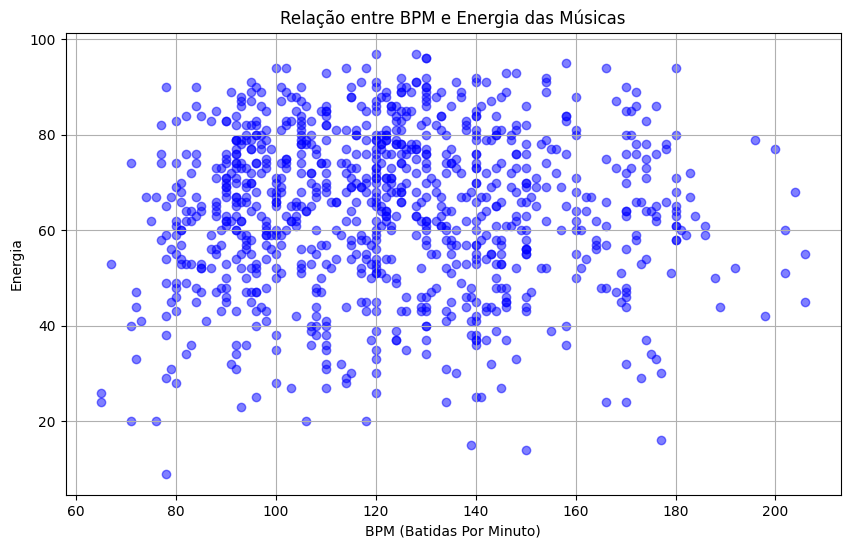

In [10]:
# 6 - Qual a relação de bpm e energia das musicas?

plt.figure(figsize=(10, 6))
plt.scatter(df['bpm'], df['energy_%'], alpha=0.5, color='blue')

plt.title('Relação entre BPM e Energia das Músicas')
plt.xlabel('BPM (Batidas Por Minuto)')
plt.ylabel('Energia')
plt.grid(True)

plt.show()

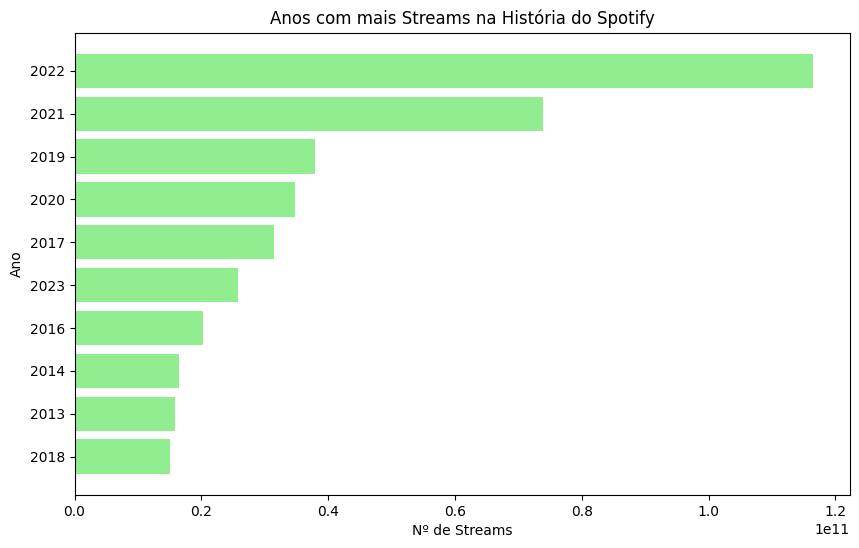

In [11]:
# 7 - Anos em relação ao numero de streams 

ano_streams = df.groupby('released_year')['streams'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(ano_streams.index.astype(str), ano_streams, color='lightgreen') 

plt.xlabel('Nº de Streams')
plt.ylabel('Ano')
plt.title('Anos com mais Streams na História do Spotify')
plt.gca().invert_yaxis() 

plt.show()

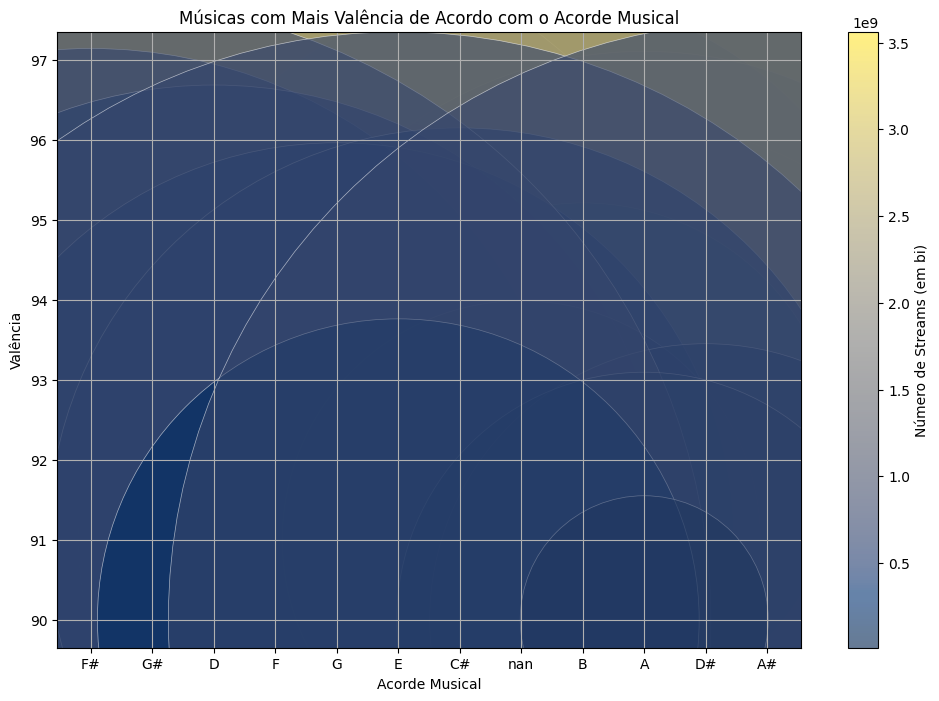

In [12]:
# 8 - as musicas de valencia por acorde musical chave, e sua média de popularidade   

musicas_por_valencia = df.sort_values(by='valence_%', ascending=False).head(50)

valencia_por_streams = musicas_por_valencia['streams'] / 1000  

plt.figure(figsize=(12, 8))
scatter = plt.scatter(musicas_por_valencia['key'].astype(str), 
                      musicas_por_valencia['valence_%'],
                      c=musicas_por_valencia['streams'], 
                      s=valencia_por_streams, 
                      cmap='cividis',
                      alpha=0.6,
                      edgecolors='w',
                      linewidths=0.5)

cbar = plt.colorbar(scatter)
cbar.set_label('Número de Streams (em bi)')

plt.xlabel('Acorde Musical')
plt.ylabel('Valência')
plt.title('Músicas com Mais Valência de Acordo com o Acorde Musical')

plt.grid(True)
plt.show()
